In [120]:
#import libraries

%matplotlib inline
import numpy as np
import pandas as pd

#importing for statistical plots
import seaborn as sns

import matplotlib.pyplot as plt

#import Logistic regression from SK learn library
from sklearn.linear_model import LogisticRegression

#import GaussianNB(Naive Bayes) from SK learn library
from sklearn.naive_bayes import GaussianNB

#import K Neighbors classifiers from SK learn library
from sklearn.neighbors import KNeighborsClassifier


#to Split the data set to Train and Test we import the below library
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

# calculate accuracy measures and confusion matrix
from sklearn import metrics


from scipy.stats import zscore

#To ccalculate roc and auc score for Logistic regression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [121]:
#load data into a dataframe
bankloan_df = pd.read_csv("C:/Users/Vivek Menon/Desktop/Great learning/Supervised learning/Project/Bank_Personal_Loan_Modelling-1.csv")

Exploratory data analysis and Descriptive analysis

In [122]:
#to check number of Rows and columns in dataset
bankloan_df.shape

(5000, 14)

In [123]:
#to check for Null Values and to find datatype
bankloan_df.info()
bankloan_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [124]:
#descriptive analysis of data, this gives insights on data distribution like skewness
#data distribution of each attribute

bankloan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [125]:
#droping the variable ID which provide no insights in model
bankloan_df1=bankloan_df.drop("ID",axis=1)

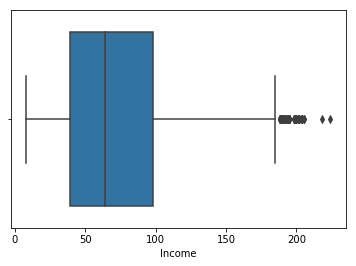

In [126]:
#to Identify outliers we use boxplots
sns.boxplot(bankloan_df1.Income)


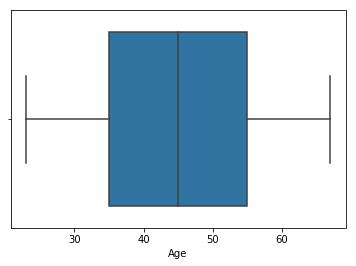

In [127]:
sns.boxplot(bankloan_df1.Age)

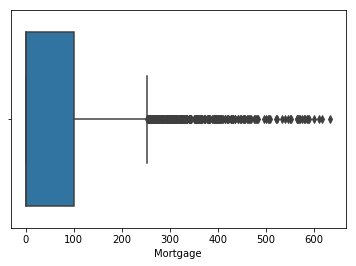

In [128]:
sns.boxplot(bankloan_df1.Mortgage)

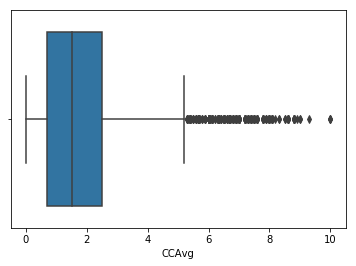

In [129]:
sns.boxplot(bankloan_df1.CCAvg)

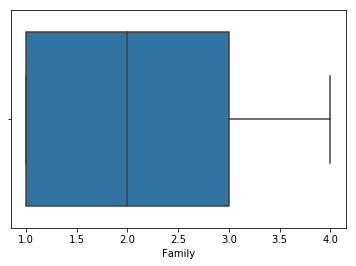

In [130]:
#to Identify outliers we use boxplots
sns.boxplot(bankloan_df1.Family)

In [131]:
#to check the distribution of data in two classes
print(bankloan_df1.groupby('Personal Loan').size())

#People who took personal loan are underrepresented

Personal Loan
0    4520
1     480
dtype: int64


(array([ 4520.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   480.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

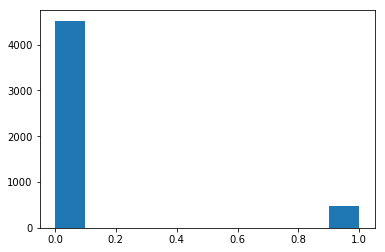

In [132]:
plt.hist(bankloan_df1["Personal Loan"],histtype='bar')

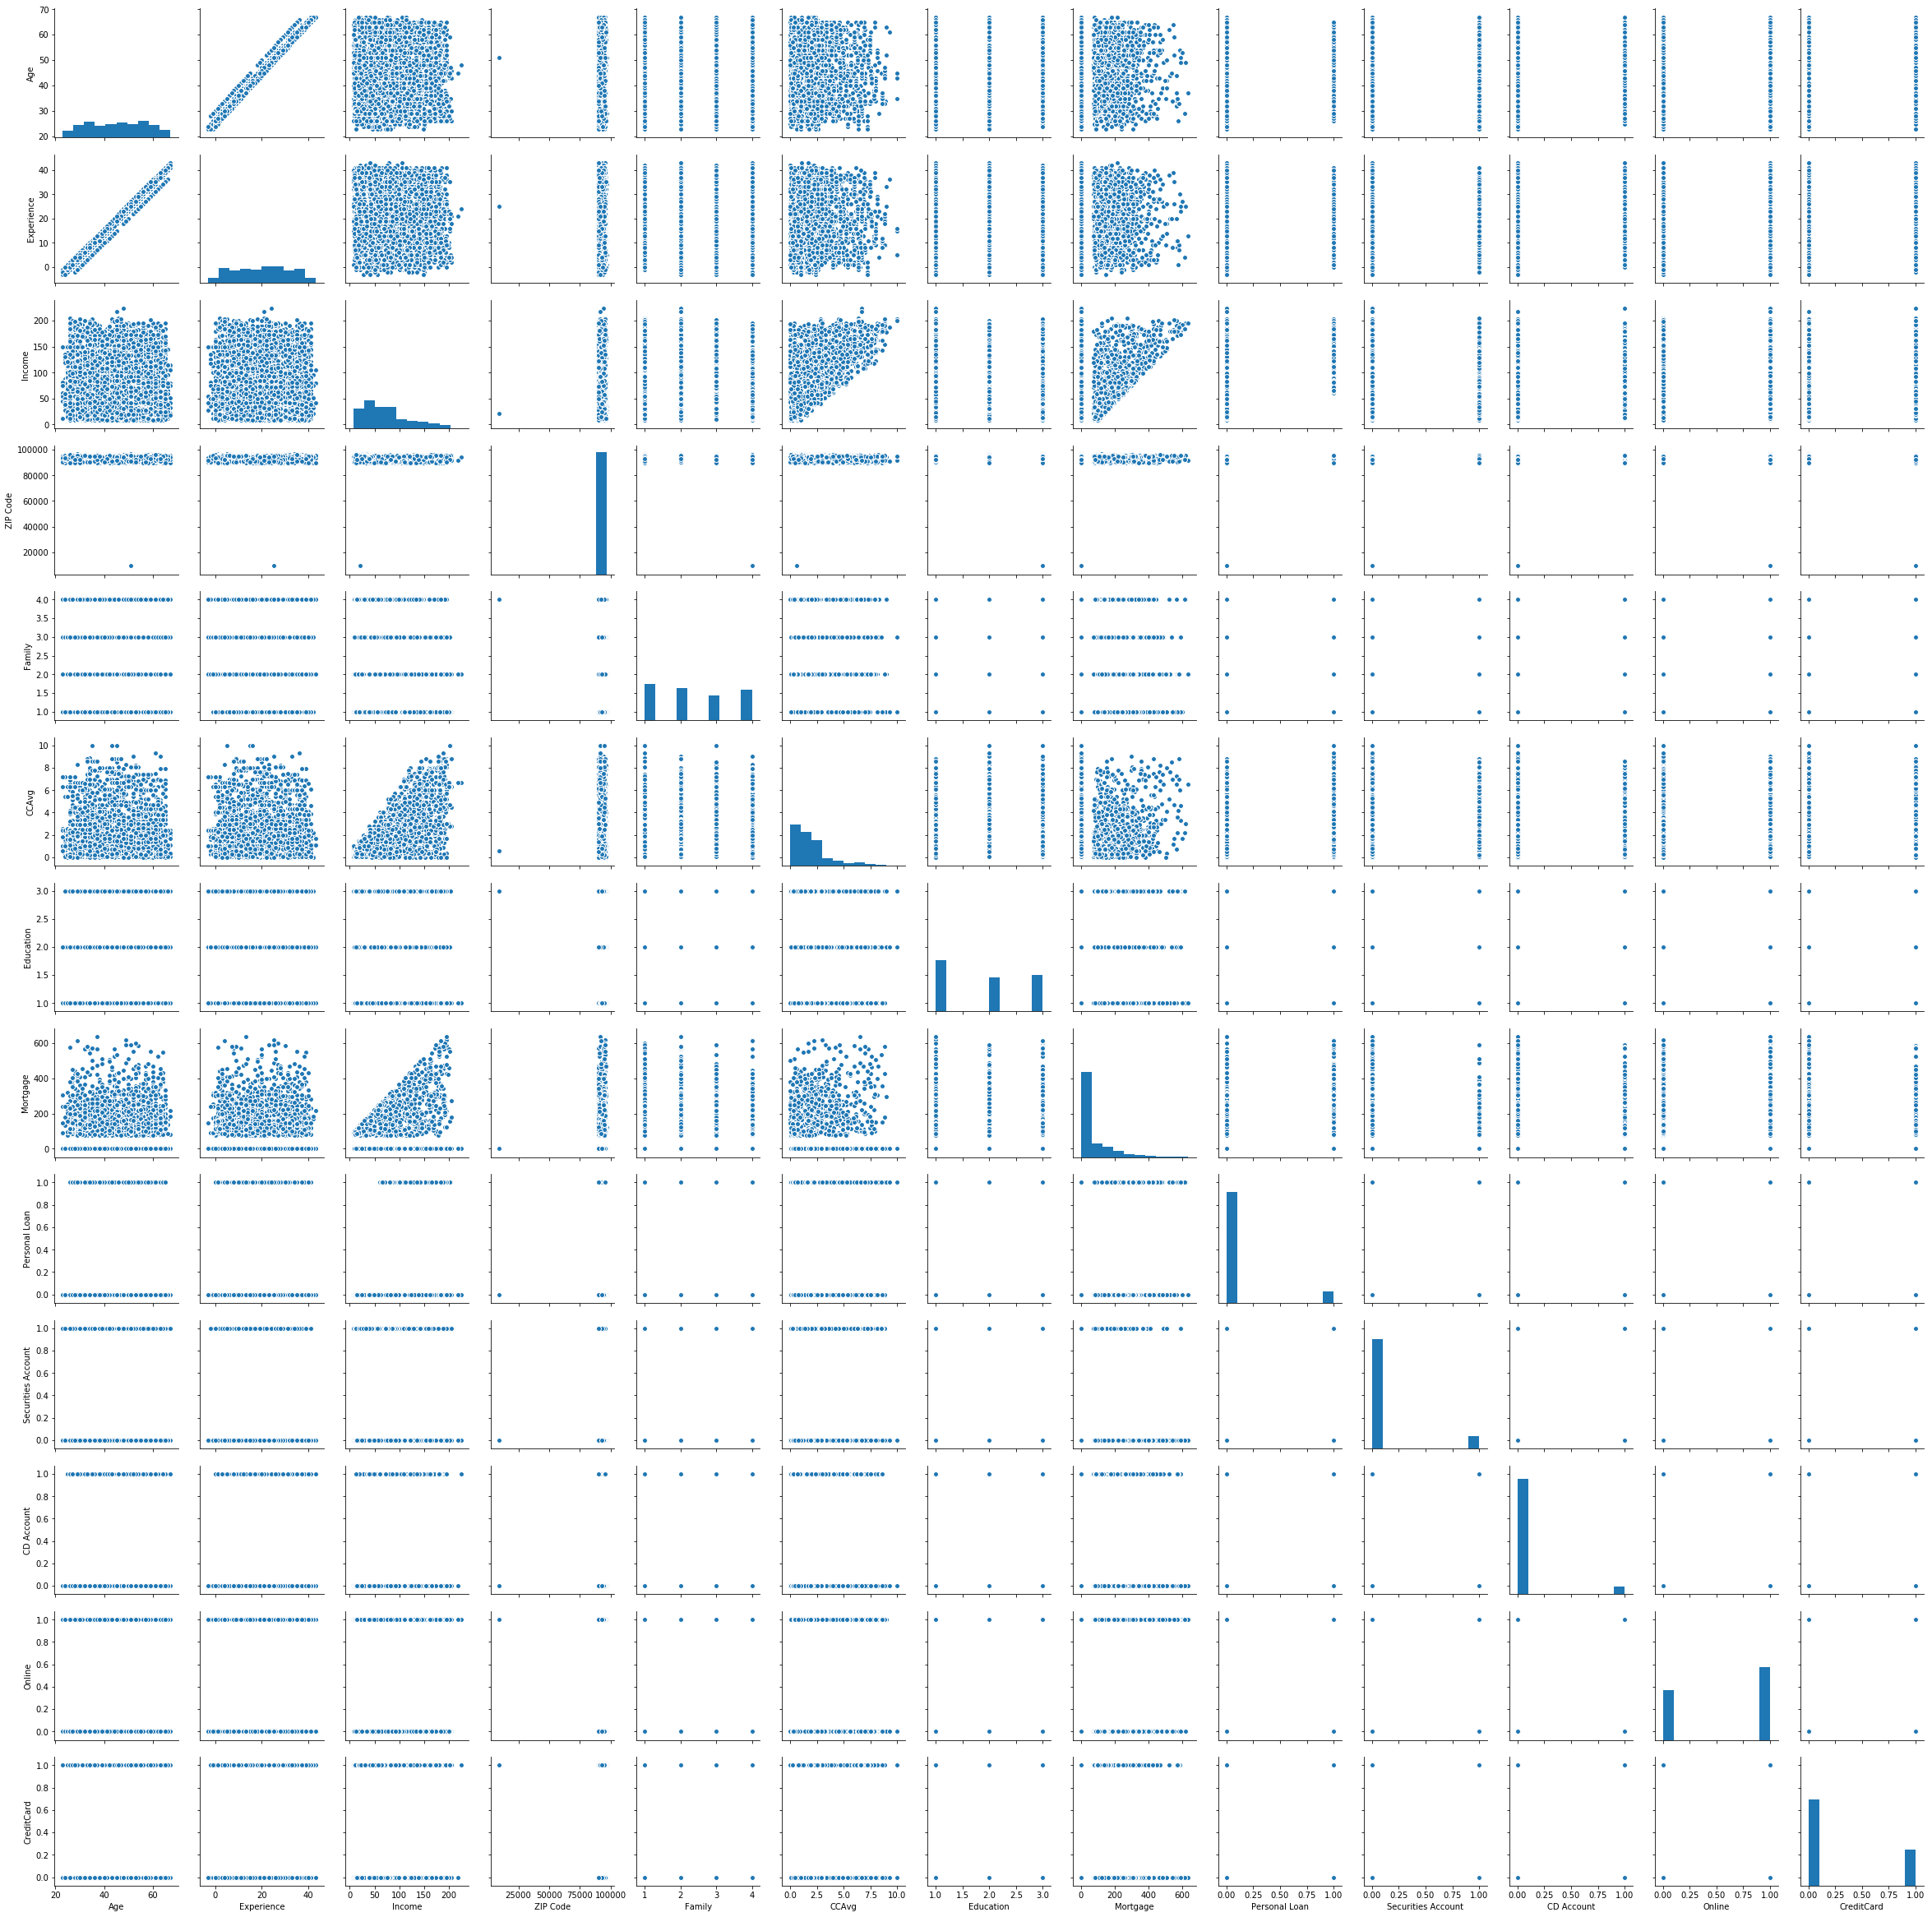

In [133]:
sns.pairplot(bankloan_df1)

In [134]:
#To find the correlation of various independent variables and also independednt and dependent variable
#the more correlated , the value will be closer to 1 or -1, lesser correlation gives value close to zero
bankloan_df1.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


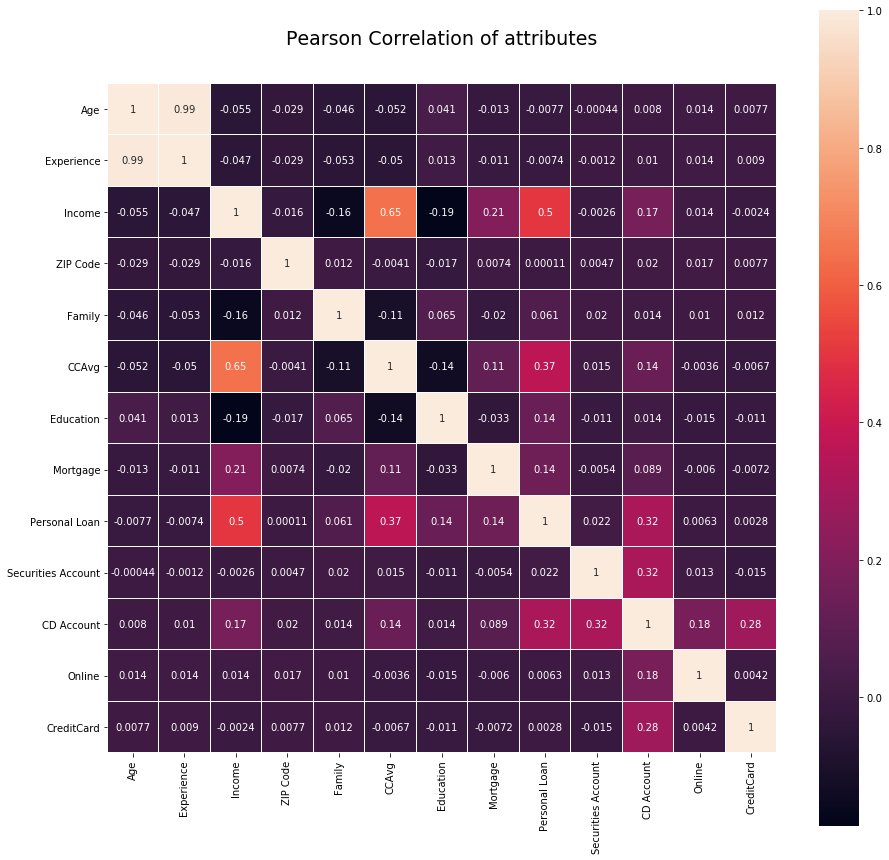

In [135]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(bankloan_df1.corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)

In [136]:
#Replace the numbers in categorical variables with actual education qualification
bankloan_df1['Education']=bankloan_df1['Education'].replace({1:'Undergrad',2:'Graduate',3:'Advanced/professional'})

In [137]:
#one hot encoding
bankloan_df2=pd.get_dummies(bankloan_df1,columns=['Education'])


In [138]:
bankloan_df2.shape

(5000, 15)

In [139]:
#Dropping "Education_Advanced/professional" as other two education columns are dependent.
bankloan_df3=bankloan_df2.drop("Education_Advanced/professional",axis=1)
bankloan_df3.shape

(5000, 14)

# Logistic Regression

In [140]:
#Define Independent variables to X. selecting all the columns except personal loan to X
X_lr=bankloan_df3.iloc[:,bankloan_df3.columns != 'Personal Loan']
X_lr.shape

(5000, 13)

In [141]:
#Define target or dependent variable. Personal loan is Dependent variable y
y_lr=bankloan_df3.iloc[:,bankloan_df3.columns =='Personal Loan']
y_lr.shape

(5000, 1)

In [142]:
#Split the data(Dependent and independent variables in training data and testing data. Testing data is 30% and Traininig 70%
X_train_lr,X_test_lr,y_train_lr,y_test_lr = train_test_split(X_lr,y_lr,test_size=0.3,random_state=1)
X_test_lr.shape

(1500, 13)

In [143]:
#LogisticRegression Classification model

model_lr = LogisticRegression()
model_lr.fit(X_train_lr,y_train_lr)
y_predict_lr= model_lr.predict(X_test_lr)


C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [144]:
#Calculate coefficients of linear model equation
t=list(X_train_lr.columns)

coef_df_lr = pd.DataFrame(model_lr.coef_,columns = t)
coef_df_lr['intercept'] = model_lr.intercept_
print(coef_df_lr)

        Age  Experience   Income  ZIP Code    Family     CCAvg  Mortgage  \
0 -0.000534   -0.002194  0.03602 -0.000065  0.016897  0.010414  0.000838   

   Securities Account  CD Account    Online  CreditCard  Education_Graduate  \
0            0.000595    0.005205 -0.000199   -0.000075            0.006026   

   Education_Undergrad  intercept  
0            -0.012352  -0.000118  


In [145]:
#Calculate Score of Model
model_Score_lr=model_lr.score(X_test_lr,y_test_lr)
print(model_Score_lr)

0.907333333333


In [146]:
#Calculate model score  and find confusion matrix(recall and precision)
print(model_Score_lr)
print(metrics.confusion_matrix(y_test_lr, y_predict_lr))
print(metrics.classification_report(y_test_lr, y_predict_lr))


0.907333333333
[[1318   33]
 [ 106   43]]
             precision    recall  f1-score   support

          0       0.93      0.98      0.95      1351
          1       0.57      0.29      0.38       149

avg / total       0.89      0.91      0.89      1500



In [147]:
#Overall score is 90 and precision and recall is more for class zero and for class one  is less represented

In [148]:
##-------------------Iteration 2------------------------------------------------

In [149]:
# Scaling the data
X_train_scaled_lr = preprocessing.scale(X_train_lr)
X_test_scaled_lr = preprocessing.scale(X_test_lr)

In [150]:
#Calculate model score  and find confusion matrix(recall and precision)
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled_lr,y_train_lr)
y_predict_scaled_lr = model_lr.predict(X_test_scaled_lr)
model_score_lr = model_lr.score(X_test_scaled_lr, y_test_lr)
print(model_score_lr)


print(metrics.confusion_matrix(y_test_lr, y_predict_scaled_lr))

print(metrics.classification_report(y_test_lr, y_predict_scaled_lr))


0.96
[[1339   12]
 [  48  101]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1351
          1       0.89      0.68      0.77       149

avg / total       0.96      0.96      0.96      1500



C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [151]:
#By scaling , improved the overall score, but the precision and recall value has not impproved

In [152]:
model_lr.predict_proba(X_test_scaled_lr)

array([[  9.76518302e-01,   2.34816983e-02],
       [  9.99850860e-01,   1.49140421e-04],
       [  9.99759888e-01,   2.40111892e-04],
       ..., 
       [  9.97250584e-01,   2.74941607e-03],
       [  9.90150898e-01,   9.84910182e-03],
       [  9.99419815e-01,   5.80185497e-04]])

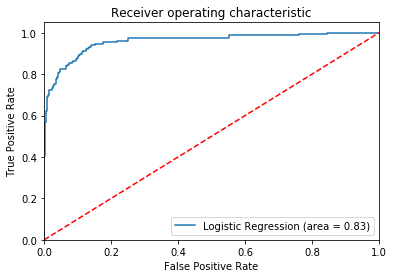

In [153]:
#AUC ROC Curve

logit_roc_auc = roc_auc_score(y_test_lr, model_lr.predict(X_test_scaled_lr))
fpr, tpr, thresholds = roc_curve(y_test_lr, model_lr.predict_proba(X_test_scaled_lr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [154]:
auc_score = metrics.roc_auc_score(y_test_lr, model_lr.predict_proba(X_test_scaled_lr)[:,1])
round( float( auc_score ), 2 )

0.96

C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   Experience    Income    Family     CCAvg  Mortgage  Securities Account  \
0   -0.004195  0.048684  0.420247  0.179582  0.000783           -0.868498   

   CD Account    Online  CreditCard  Education_Graduate  Education_Undergrad  \
0    3.117215 -0.628109   -0.897868           -0.150746            -3.429566   

   intercept  
0  -7.301533  
0.957333333333
[[1342    9]
 [  55   94]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1351
          1       0.91      0.63      0.75       149

avg / total       0.96      0.96      0.95      1500

0.959333333333
[[1339   12]
 [  49  100]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1351
          1       0.89      0.67      0.77       149

avg / total       0.96      0.96      0.96      1500



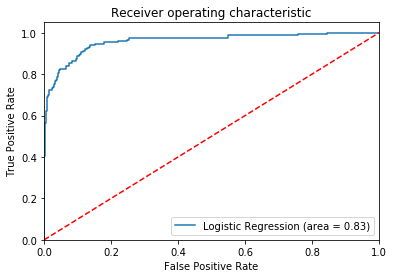

0.96

In [155]:
#removing fields which are dependent(age and Experience are dependent) and which has no relevance or least correlation with Target variable
#Least coefficient as well
#Calculated the model score and confusion and classification reports before and after scaling the data
#Also calculated AOC curve
bankloan_df5=bankloan_df3.drop("ZIP Code",axis=1)
bankloan_df4=bankloan_df5.drop("Age",axis=1)
X_lr2=bankloan_df4.iloc[:,bankloan_df4.columns != 'Personal Loan']
y_lr2=bankloan_df4.iloc[:,bankloan_df4.columns =='Personal Loan']
X_train_lr2,X_test_lr2,y_train_lr2,y_test_lr2 = train_test_split(X_lr2,y_lr2,test_size=0.3,random_state=1)
model_lr2 = LogisticRegression()
model_lr2.fit(X_train_lr2,y_train_lr2)
y_predict_lr2= model_lr2.predict(X_test_lr2)
#Calculate coefficients 
t2=list(X_train_lr2.columns)

coef_df_lr2 = pd.DataFrame(model_lr2.coef_,columns = t2)
coef_df_lr2['intercept'] = model_lr2.intercept_
print(coef_df_lr2)

#Calculate Score of Model
model_Score_lr2=model_lr2.score(X_test_lr2,y_test_lr2)
print(model_Score_lr2)

print(metrics.confusion_matrix(y_test_lr2, y_predict_lr2))

print(metrics.classification_report(y_test_lr2, y_predict_lr2))


# Scaling the data
X_train_scaled_lr2 = preprocessing.scale(X_train_lr2)
X_test_scaled_lr2 = preprocessing.scale(X_test_lr2)
model_lr2 = LogisticRegression()
model_lr2.fit(X_train_scaled_lr2,y_train_lr2)
y_predict_scaled_lr2 = model_lr2.predict(X_test_scaled_lr2)
model_score_lr2 = model_lr2.score(X_test_scaled_lr2, y_test_lr2)
print(model_score_lr2)


print(metrics.confusion_matrix(y_test_lr2, y_predict_scaled_lr2))

print(metrics.classification_report(y_test_lr2, y_predict_scaled_lr2))

#AUC ROC Curve

logit_roc_auc1 = roc_auc_score(y_test_lr2, model_lr2.predict(X_test_scaled_lr2))
fpr, tpr, thresholds = roc_curve(y_test_lr2, model_lr2.predict_proba(X_test_scaled_lr2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

auc_score1 = metrics.roc_auc_score(y_test_lr2, model_lr2.predict_proba(X_test_scaled_lr2)[:,1])
round( float( auc_score1 ), 2 )

In [156]:
##Findings : No significance change  in overall score or ROC/AUC, but slight improvement in Precision and Recall for class 1

# Naive Bayes

In [157]:
#Define Independent variables to X_nb
X_nb=bankloan_df3.iloc[:,bankloan_df3.columns != 'Personal Loan']

In [158]:
#Define target or dependent variable y_nb
y_nb=bankloan_df3.iloc[:,bankloan_df3.columns =='Personal Loan']


In [159]:
#Split the data(Dependent and independent variables in training data and testing data. Testing data is 30% and Traininig 70%
X_train_nb,X_test_nb,y_train_nb,y_test_nb = train_test_split(X_nb,y_nb,test_size=0.3,random_state=1)

In [160]:
model_nb = GaussianNB()
model_nb.fit(X_train_nb,y_train_nb)
print(model_nb)
y_predict_nb= model_nb.predict(X_test_nb)


GaussianNB(priors=None)


C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [161]:
#Calculate the model score of Naive Bayes
model_Score_nb=model_nb.score(X_test_nb,y_test_nb)
print(model_Score_nb)

0.888


In [162]:
#Calculate confusion metrics and classification report of Naive bayes
print(metrics.confusion_matrix(y_test_nb, y_predict_nb))
print(metrics.classification_report(y_test_nb, y_predict_nb))

[[1246  105]
 [  63   86]]
             precision    recall  f1-score   support

          0       0.95      0.92      0.94      1351
          1       0.45      0.58      0.51       149

avg / total       0.90      0.89      0.89      1500



In [163]:
bankloan_df5=bankloan_df3.drop("ZIP Code",axis=1)
bankloan_df4=bankloan_df5.drop("Age",axis=1)

X_nb1=bankloan_df4.iloc[:,bankloan_df4.columns != 'Personal Loan']
y_nb1=bankloan_df4.iloc[:,bankloan_df4.columns =='Personal Loan']
X_train_nb1,X_test_nb1,y_train_nb1,y_test_nb1 = train_test_split(X_nb1,y_nb1,test_size=0.3,random_state=1)
model_nb1 = GaussianNB()
model_nb1.fit(X_train_nb1,y_train_nb1)
print(model_nb1)
y_predict_nb1= model_nb1.predict(X_test_nb1)

model_Score_nb1=model_nb1.score(X_test_nb1,y_test_nb1)
print(model_Score_nb1)

print(metrics.confusion_matrix(y_test_nb1, y_predict_nb1))
print(metrics.classification_report(y_test_nb1, y_predict_nb1))


GaussianNB(priors=None)
0.882666666667
[[1237  114]
 [  62   87]]
             precision    recall  f1-score   support

          0       0.95      0.92      0.93      1351
          1       0.43      0.58      0.50       149

avg / total       0.90      0.88      0.89      1500



C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNN

In [185]:
bankloan_df6 = bankloan_df.drop(labels="Personal Loan",axis = 1)
#Scaling

bankloan_df6_z=bankloan_df6.apply(zscore)
X_knn=np.array(bankloan_df6_z)
y_knn=bankloan_df3.iloc[:,bankloan_df3.columns =='Personal Loan']
y_knn1=y_knn.apply(zscore)


In [186]:
#Define X and Y axis 
yknnn=np.array(y_knn1)
X_knnn=np.array(X_knn)


In [187]:
#Split the data(Dependent and independent variables in training data and testing data. Testing data is 30% and Traininig 70%
X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(X_knnn,y_knnn,test_size=0.3,random_state=1)

In [188]:
#K Neighbors Classifier model
NNH= KNeighborsClassifier(n_neighbors=5,weights = 'distance')

In [189]:
#Fit function to train

NNH.fit(X_train_knn,y_train_knn)

C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [190]:
#Predict the Y PRedict variable using Model
y_predict_knn = NNH.predict(X_test_knn)
NNH.score(X_test_knn,y_test_knn)

0.94399999999999995

In [191]:
#Calculate Confusion Metrics and classification report

print(metrics.confusion_matrix(y_test_knn, y_predict_knn))

print(metrics.classification_report(y_test_knn, y_predict_knn))

[[1345    6]
 [  78   71]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1351
          1       0.92      0.48      0.63       149

avg / total       0.94      0.94      0.94      1500



In [192]:
#To find the best K value , we will take odd vlaues of K and calculate error and will select the one with lease error
#cross validation
#creating odd numbers of K for KNN Valdiation

mylist=list(range(1,20))

neighbors=list(filter(lambda x:x % 2 != 0,mylist))

In [193]:
#list that will hold scores

scores = []

for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train_knn,y_train_knn)
    
    y_pred_knn1=KNN.predict(X_test_knn)
    Scores=KNN.score(X_test_knn,y_test_knn)
    scores.append(Scores)
    
MSE = [1-x for x in scores]

C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [194]:
#Calculate the best or optimal value of K
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of k is %d" %optimal_k)

The optimal number of k is 7


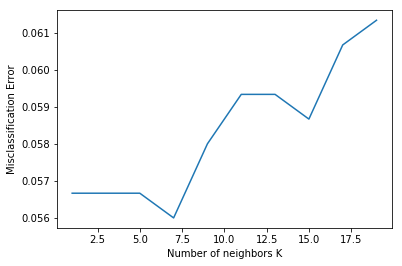

In [195]:
#Plot error vs K value
import matplotlib.pyplot as plt

plt.plot(neighbors,MSE)
plt.xlabel('Number of neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [197]:
#Train and Calculate the score of KNN algorithm
NNH= KNeighborsClassifier(n_neighbors=7,weights = 'distance')
NNH.fit(X_train_knn,y_train_knn)
y_predict_knn = NNH.predict(X_test_knn)
NNH.score(X_test_knn,y_test_knn)

C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


0.94466666666666665

In [198]:
#Calculate confusion metrics and classification report of KNN
print(metrics.confusion_matrix(y_test_knn, y_predict_knn))

print(metrics.classification_report(y_test_knn, y_predict_knn))

[[1345    6]
 [  77   72]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1351
          1       0.92      0.48      0.63       149

avg / total       0.94      0.94      0.94      1500



In [199]:
#Iteration 2

C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


The optimal number of k is 3


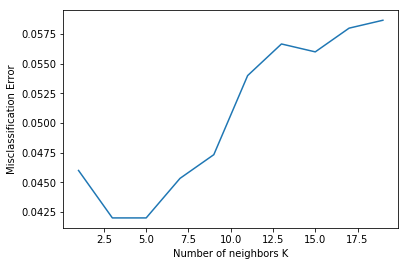

In [200]:
#By Dropping Zipcode and Age

bankloan_df5=bankloan_df3.drop("ZIP Code",axis=1)
bankloan_df4=bankloan_df5.drop("Age",axis=1)
bankloan_df6 = bankloan_df4.drop(labels="Personal Loan",axis = 1)
#Scaling

bankloan_df6_z=bankloan_df6.apply(zscore)
X_knn=np.array(bankloan_df6_z)
y_knn=bankloan_df5.iloc[:,bankloan_df5.columns =='Personal Loan']
y_knn1=y_knn.apply(zscore)

#Define X and Y axis 
yknnn=np.array(y_knn)
X_knn=np.array(X_knn)

#Split the data(Dependent and independent variables in training data and testing data. Testing data is 30% and Traininig 70%
X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(X_knn,yknnn,test_size=0.3,random_state=1)



mylist=list(range(1,20))

neighbors=list(filter(lambda x:x % 2 != 0,mylist))


scores = []

for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train_knn,y_train_knn)
    
    y_pred_knn1=KNN.predict(X_test_knn)
    Scores=KNN.score(X_test_knn,y_test_knn)
    scores.append(Scores)
    
MSE = [1-x for x in scores]

#Calculate the best or optimal value of K
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of k is %d" %optimal_k)

#Plot error vs K value
import matplotlib.pyplot as plt

plt.plot(neighbors,MSE)
plt.xlabel('Number of neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [206]:
#K Neighbors Classifier model
NNH= KNeighborsClassifier(n_neighbors=3,weights = 'distance')

#Fit function to train


NNH.fit(X_train_knn,y_train_knn)

#Predict the Y PRedict variable using Model
y_predict_knn = NNH.predict(X_test_knn)


print(NNH.score(X_test_knn,y_test_knn))

#Calculate Confusion Metrics and classification report

print(metrics.confusion_matrix(y_test_knn, y_predict_knn))

print(metrics.classification_report(y_test_knn, y_predict_knn))

C:\Users\Vivek Menon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.958666666667
[[1342    9]
 [  53   96]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1351
          1       0.91      0.64      0.76       149

avg / total       0.96      0.96      0.96      1500



In [ ]:
#Logistic regression classification and K NN gives better score and precision/recall. 
#Logistic Regression model is slightly better than Naive bayes or KNN